In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas_profiling as pp
import sys
import os

In [2]:
df = pd.read_csv('survey_results_public.csv')

In [3]:
df.head()

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN


In [4]:
df = df[['Country', 
         'EdLevel', 
         'YearsCodePro',
         'Employment', 
         'MainBranch',
         'ConvertedCompYearly']]

df = df.rename({'ConvertedCompYearly': 'Salary'}, axis=1)
df.head()

,Country,EdLevel,YearsCodePro,Employment,MainBranch,Salary
0,Slovakia,"Secondary school (e.g. American high school, G...",NaN,"Independent contractor, freelancer, or self-em...",I am a developer by profession,62268.0
1,Netherlands,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,"Student, full-time",I am a student who is learning to code,NaN
2,Russian Federation,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,"Student, full-time","I am not primarily a developer, but I write co...",NaN
3,Austria,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,Employed full-time,I am a developer by profession,NaN
4,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",10,"Independent contractor, freelancer, or self-em...",I am a developer by profession,NaN


In [5]:
df.shape

(83439, 6)

In [6]:
pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
df = df[df['Salary'].notnull()]
df = df.dropna()
df.shape

(46359, 6)

In [8]:
df = df[df["Employment"] == "Employed full-time"]
df = df.drop("Employment", axis=1)
df.shape

(40211, 5)

In [9]:
df['Country'].value_counts()


United States of America                                9175
India                                                   3385
Germany                                                 2753
United Kingdom of Great Britain and Northern Ireland    2604
Canada                                                  1553
                                                        ... 
Saint Kitts and Nevis                                      1
Monaco                                                     1
Libyan Arab Jamahiriya                                     1
Somalia                                                    1
Burundi                                                    1
Name: Country, Length: 166, dtype: int64

In [10]:
def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map

In [11]:
country_map = shorten_categories(df.Country.value_counts(), 400)
df['Country'] = df['Country'].map(country_map)
df.Country.value_counts()


Other                                                   10725
United States of America                                 9175
India                                                    3385
Germany                                                  2753
United Kingdom of Great Britain and Northern Ireland     2604
Canada                                                   1553
France                                                   1396
Brazil                                                   1340
Spain                                                     890
Netherlands                                               835
Australia                                                 825
Poland                                                    775
Italy                                                     756
Russian Federation                                        741
Sweden                                                    735
Turkey                                                    458
Switzerl

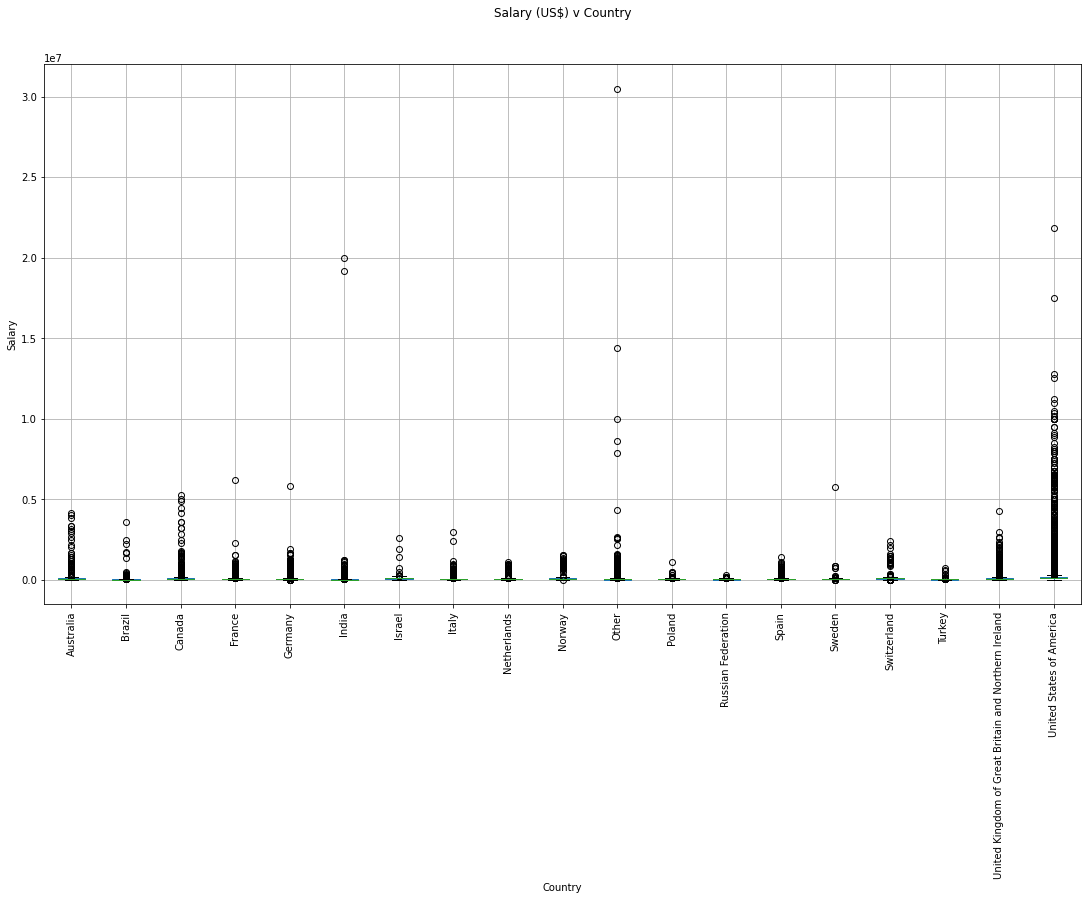

In [12]:
%matplotlib inline
fig, ax = plt.subplots(1,1, figsize=(18, 10))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [13]:
df = df[df["Salary"] <= 250000]
df = df[df["Salary"] >= 10000]
df = df[df['Country'] != 'Other']

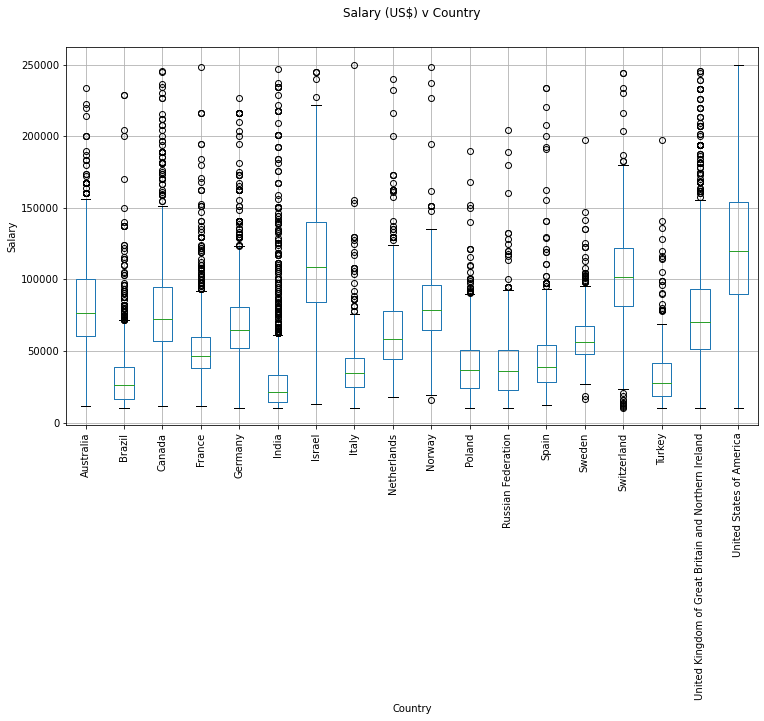

In [14]:
%matplotlib inline
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [15]:
df["YearsCodePro"].unique()

array(['4', '5', '6', '2', '18', '21', '16', '10', 'Less than 1 year',
       '3', '15', '12', '8', '17', '1', '14', '26', '34', '11', '25',
       '24', '22', '13', '9', '7', '39', '20', '27', '23', '30', '19',
       '35', '33', '37', '43', '40', '29', '38', '31', '42', '28', '46',
       '32', '36', '47', '45', '44', '41', 'More than 50 years', '50',
       '49', '48'], dtype=object)

In [16]:
def clean_experience(x):
    if x ==  'More than 50 years':
        return 50
    if x == 'Less than 1 year':
        return 0.5
    return float(x)

df['YearsCodePro'] = df['YearsCodePro'].apply(clean_experience)

In [17]:
df["EdLevel"].unique()

array(['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Professional degree (JD, MD, etc.)',
       'Some college/university study without earning a degree',
       'Other doctoral degree (Ph.D., Ed.D., etc.)', 'Something else',
       'Primary/elementary school', 'Associate degree (A.A., A.S., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)'],
      dtype=object)

In [18]:
def clean_education(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor degree'
    if 'Master’s degree' in x:
        return 'Master degree'
    if 'Professional degree' in x or 'Other doctoral' in x:
        return 'Post grad'
    return 'Less than a Bachelor'

df['EdLevel'] = df['EdLevel'].apply(clean_education)

In [19]:
df["EdLevel"].unique()

array(['Master degree', 'Bachelor degree', 'Post grad',
       'Less than a Bachelor'], dtype=object)

In [20]:
df.MainBranch.unique()

array(['I am a developer by profession',
       'I am not primarily a developer, but I write code sometimes as part of my work'],
      dtype=object)

In [21]:
def clean_mainbranch(x):
    if 'I am a developer by profession' in x:
        return 'proffesional'
    return 'non proffesional'

df['MainBranch'] = df['MainBranch'].apply(clean_mainbranch)

In [22]:
df.head()

,Country,EdLevel,YearsCodePro,MainBranch,Salary
9,Sweden,Master degree,4.0,proffesional,51552.0
11,Spain,Bachelor degree,5.0,proffesional,46482.0
12,Germany,Master degree,6.0,proffesional,77290.0
16,Turkey,Bachelor degree,2.0,proffesional,17748.0
17,Canada,Bachelor degree,6.0,proffesional,46135.0


In [23]:
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.linear_model import LinearRegression
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.metrics import mean_squared_error, mean_absolute_error
# from sklearn import metrics
# from sklearn.preprocessing import LabelEncoder
# from sklearn.model_selection import train_test_split


In [24]:
# le_education = LabelEncoder()
# df['EdLevel'] = le_education.fit_transform(df['EdLevel'])
# df["EdLevel"].unique()
# #
# le_country = LabelEncoder()
# df['Country'] = le_country.fit_transform(df['Country'])
# df["Country"].unique()

In [25]:
# df.head()

In [26]:
# X = df.drop("Salary", axis=1)
# y = df["Salary"]

In [27]:
# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=1/3, random_state=0)

In [28]:
# models = []
# models.append(('DT', DecisionTreeRegressor()))
# models.append(('LR', LinearRegression()))
# models.append(('RF', RandomForestRegressor()))
# models.append(('XG', GradientBoostingRegressor()))
# # evaluate each model


# for name, model in models:
#     model.fit(X_train, y_train)
#     y_predict = model.predict(X_test)
#     mae = metrics.mean_absolute_error(y_test, y_predict)
#     mse = metrics.mean_squared_error(y_test, y_predict)
#     r2 = metrics.r2_score(y_test, y_predict)

#     print(f"The model {name} performance for testing set")
#     print("--------------------------------------")
#     print('MAE is {}'.format(mae))
#     print('MSE is {}'.format(mse))
#     print('R2 score is {}'.format(r2))
#     print('\n')


In [29]:
from sklearn.model_selection import train_test_split

data, data_unseen = train_test_split(df, test_size=0.2, random_state=25)

print(f"No. of training examples: {data.shape}")
print(f"No. of testing examples: {data_unseen.shape}")



No. of training examples: (20984, 5)
No. of testing examples: (5246, 5)


In [30]:
from pycaret.regression import *

In [31]:
data.head()

,Country,EdLevel,YearsCodePro,MainBranch,Salary
30128,United States of America,Bachelor degree,9.0,proffesional,150000.0
74240,United States of America,Master degree,2.0,proffesional,119500.0
7977,Netherlands,Master degree,20.0,proffesional,216196.0
53060,United States of America,Less than a Bachelor,11.0,proffesional,83000.0
53390,Italy,Bachelor degree,5.0,proffesional,35672.0


In [32]:
# exp_reg101 = setup(data = data,
#                    target = 'Salary', 
#                    transform_target = True,
#                    numeric_features = ['YearsCodePro'],
#                    categorical_features = ['Country'],
#                    ordinal_features = { 'EdLevel' : ['Post grad', 
#                                                      'Master degree', 
#                                                      'Bachelor degree', 
#                                                      'Less than a Bachelor'] },
#                    train_size= 0.8,
#                    session_id=123)



exp_reg101 = setup(data = data, 
                   target = 'Salary',
                  session_id = 12)

,Description,Value
0,session_id,12
1,Target,Salary
2,Original Data,"(20984, 5)"
3,Missing Values,False
4,Numeric Features,1
5,Categorical Features,3
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(14688, 24)"


In [33]:
best = compare_models(exclude = ['ransac'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,22589.6269,1057233402.8808,32460.4367,0.5866,0.4163,0.3652,0.1660
gbr,Gradient Boosting Regressor,22807.0996,1058116899.3406,32477.8156,0.5862,0.4255,0.3827,0.1130
catboost,CatBoost Regressor,22675.6634,1065638345.0558,32590.2042,0.5833,0.4180,0.3654,0.7930
xgboost,Extreme Gradient Boosting,23109.4066,1105173420.8000,33188.6717,0.5678,0.4246,0.3706,0.2510
lr,Linear Regression,23567.9781,1121772096.0000,33440.0666,0.5613,0.4322,0.3850,0.3420
lasso,Lasso Regression,23568.1781,1121772294.4000,33440.0564,0.5613,0.4322,0.3851,0.1800
ridge,Ridge Regression,23569.6133,1121770361.6000,33440.0129,0.5613,0.4323,0.3853,0.0180
lar,Least Angle Regression,23567.8327,1121769264.3728,33440.0239,0.5613,0.4322,0.3850,0.0180
br,Bayesian Ridge,23571.0686,1121773422.7988,33440.0364,0.5613,0.4323,0.3854,0.0190
llar,Lasso Least Angle Regression,23585.8019,1122064813.0279,33444.4541,0.5612,0.4329,0.3877,0.0180


In [34]:
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,24081.5745,1226480727.1119,35021.1469,0.5433,0.4302,0.3636
1,22034.6180,1004142835.0028,31688.2129,0.5977,0.4140,0.3719
2,22015.1201,938000179.3191,30626.7886,0.6128,0.3913,0.3442
3,23628.4246,1157446316.6019,34021.2627,0.5680,0.4174,0.3650
4,22651.6231,1056553437.8656,32504.6679,0.5905,0.4140,0.3516
5,21394.9913,878131075.5732,29633.2765,0.6260,0.4055,0.3705
6,23696.9395,1243196424.4197,35258.9907,0.5479,0.4350,0.3810
7,21375.2387,897423544.6745,29957.0283,0.6230,0.4097,0.3676
8,22464.9588,1079539748.7721,32856.3502,0.5631,0.4176,0.3583
9,22552.7805,1091419739.4670,33036.6424,0.5937,0.4284,0.3785


In [35]:
tuned_lgbm = tune_model(lightgbm)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,24046.2917,1224163396.2671,34988.0465,0.5442,0.4285,0.3598
1,22125.6542,996101688.7560,31561.0787,0.6009,0.4121,0.3713
2,21848.4527,923719335.2825,30392.7514,0.6187,0.3892,0.3418
3,23592.5528,1148915013.7027,33895.6489,0.5712,0.4176,0.3645
4,22699.1617,1057603205.7235,32520.8119,0.5901,0.4184,0.3524
5,21373.3256,875629024.8053,29591.0295,0.6270,0.4059,0.3692
6,23642.5250,1236656867.9312,35166.1324,0.5503,0.4337,0.3775
7,21379.8799,891072883.5483,29850.8439,0.6256,0.4123,0.3693
8,22295.6908,1061363426.2662,32578.5731,0.5705,0.4142,0.3548
9,22445.4378,1086602808.4476,32963.6589,0.5955,0.4271,0.3748


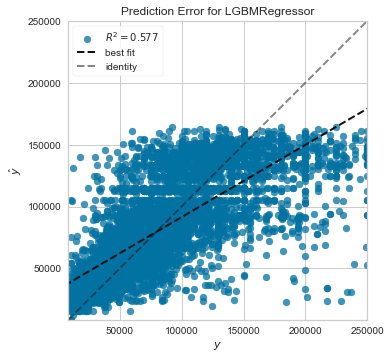

In [36]:
plot_model(tuned_lgbm, plot = 'error')

In [37]:
predict_model(tuned_lgbm);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,22955.9635,1093633544.1410,33070.1307,0.5769,0.4204,0.3667


In [38]:
final_lightgbm = finalize_model(tuned_lgbm)

In [39]:
unseen_predictions = predict_model(final_lightgbm, data=data_unseen)
unseen_predictions.head()

,Country,EdLevel,YearsCodePro,MainBranch,Salary,Label
51902,United States of America,Bachelor degree,11.0,proffesional,140000.0,135609.238923
1071,France,Post grad,0.5,proffesional,24000.0,37901.635858
76604,United Kingdom of Great Britain and Northern I...,Master degree,2.0,proffesional,45241.0,62335.876231
63210,Germany,Less than a Bachelor,12.0,proffesional,77831.0,67114.648851
52013,United States of America,Master degree,7.0,proffesional,120000.0,136975.941787


In [40]:
from pycaret.utils import check_metric
check_metric(unseen_predictions.Salary, unseen_predictions.Label, 'MAE')

22627.2724

In [41]:
save_model(final_lightgbm,'Final_Model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='Salary',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy=...
                                colsample_bytree=1.0, feature_fraction=0.7,
                                importance_type='split', learning_rate=0.3,
                                max_depth=-1, min_child_samples=71,
                                min_child_weight=0.001, min_split_gain=0.3,
                 

In [42]:
saved_final_lightgbm = load_model('Final_Model')

Transformation Pipeline and Model Successfully Loaded


In [43]:
new_prediction = predict_model(saved_final_lightgbm, data=data_unseen)

In [44]:
new_prediction.head()

,Country,EdLevel,YearsCodePro,MainBranch,Salary,Label
51902,United States of America,Bachelor degree,11.0,proffesional,140000.0,135609.238923
1071,France,Post grad,0.5,proffesional,24000.0,37901.635858
76604,United Kingdom of Great Britain and Northern I...,Master degree,2.0,proffesional,45241.0,62335.876231
63210,Germany,Less than a Bachelor,12.0,proffesional,77831.0,67114.648851
52013,United States of America,Master degree,7.0,proffesional,120000.0,136975.941787


In [45]:
check_metric(new_prediction.Salary, new_prediction.Label, 'MAE')

22627.2724

In [46]:
features ={'Country': "USA", 'EdLevel': 'Master degree' ,
           'YearsCodePro': 11.0, 'MainBranch': 'professional'}
 

features_df  = pd.DataFrame([features])

In [47]:
 predict_model(saved_final_lightgbm, data=features_df)['Label'][0]

95844.52491592674